# Лабораторная работа №1
## Кластерный иерархический анализ на датафрейме "Леденцы"

In [15]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
matplotlib.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import os

In [2]:
from src.config import FILE_LOLLIPOPS, ENCODINGS

In [3]:
os.chdir(r"C:\Users\print\OneDrive\Рабочий стол\Data_Analysis_in_Python\DA_on_python_labs\data")

In [4]:
os.getcwd()

'C:\\Users\\print\\OneDrive\\Рабочий стол\\Data_Analysis_in_Python\\DA_on_python_labs\\data'

#### Выполнена базовая подготовка к работе

In [5]:
df = pd.read_csv(FILE_LOLLIPOPS, encoding=ENCODINGS[0], sep=';')

In [6]:
df.shape

(338, 11)

In [7]:
df.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,4,5,5,5,3,3,3,3,3,3,3
1,5,4,5,5,3,3,3,3,3,3,3
2,5,5,4,5,3,3,3,3,3,3,3
3,5,4,5,5,3,3,3,3,3,3,3
4,4,5,5,5,3,3,3,3,3,3,3


#### Данные успешно импортированы, определили количество столбцов и строк, а также вывели данные для проверки

In [11]:
df.isna().sum()

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
dtype: int64

In [10]:
for col in df.columns:
    print(col, "->", sorted(df[col].unique()))

V1 -> [2, 3, 4, 5]
V2 -> [2, 3, 4, 5]
V3 -> [2, 3, 4, 5]
V4 -> [2, 3, 4, 5]
V5 -> [2, 3, 4, 5]
V6 -> [2, 3, 4, 5]
V7 -> [2, 3, 4, 5]
V8 -> [2, 3, 4, 5]
V9 -> [2, 3, 4, 5]
V10 -> [2, 3, 4, 5]
V11 -> [2, 3, 4, 5]


#### Сделали небольшую проверку данных:
Проверили данные на пропуски, таковых не оказалось

Затем выводим уникальные значения данных по каждому столбцу

У нас в каждом столбце уникальные значения, это 2,3,4,5 => данные полные и стандартизация не нужна

# Исследование данных
Посмотрим основную информацию о наборе данных

In [14]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000
mean,3.544379,3.526627,3.517751,3.411243,3.207101,3.204142,3.254438,3.289941,3.603550,3.550296,3.565089
std,0.955748,0.956410,0.990150,0.992311,0.867314,0.869725,0.844107,0.821784,0.969682,0.927082,0.942042
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,5.000000,5.000000,5.000000,4.000000,3.000000,3.000000,3.000000,3.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Проведем кластеризацию

In [16]:
Z = linkage(df, method='ward', metric='euclidean')

#### Для кластеризации используем метод Ward с евклидовой метрикой

Этот метод применим, так как все признаки в одной шкале, единица измерения и диапазон совпадают

In [47]:
print(type(Z))
print(Z.shape)
print(Z[:10])

<class 'numpy.ndarray'>
(337, 4)
[[  0.   4.   0.   2.]
 [  1.   3.   0.   2.]
 [  2.   6.   0.   2.]
 [  5. 339.   0.   3.]
 [ 32. 338.   0.   3.]
 [  7. 341.   0.   4.]
 [  8.  30.   0.   2.]
 [ 12.  15.   0.   2.]
 [ 16. 345.   0.   3.]
 [ 17. 346.   0.   4.]]


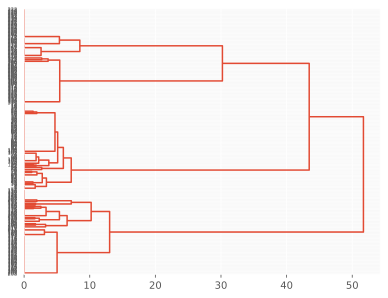

In [51]:
dn = dendrogram(Z,
                color_threshold=-1,
                labels=df.index.tolist(),
                orientation='right'
                )

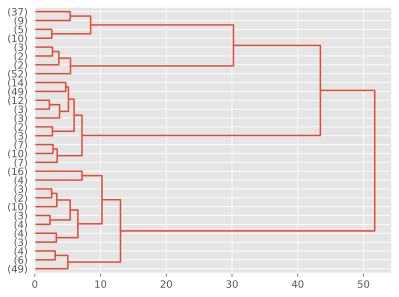

In [46]:
dn = dendrogram(Z,
                color_threshold=-1,
                labels=df.index.tolist(),
                orientation='right',
                truncate_mode='lastp',
                p=30
                )

Предварительно проанализировав дендрограмму можно предположить, что количество кластеров будет 4, но проведем дополнительные проверки

Оценим расстояние между объединяемыми кластерами с помощью "каменистой осыпи" ("локтя")

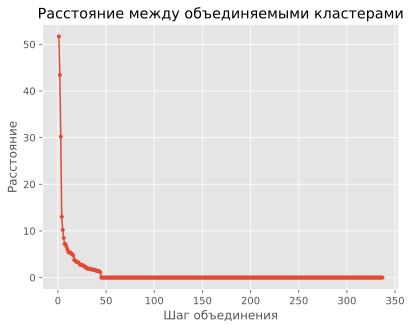

In [59]:
dist = Z[:, 2]
dist_rev = dist[::-1]
idxs = range(1, len(dist_rev) + 1)
plt.plot(idxs, dist_rev, marker='o', markersize=3)
plt.title('Расстояние между объединяемыми кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние');

В данных слишком много данных с нулевым расстоянием

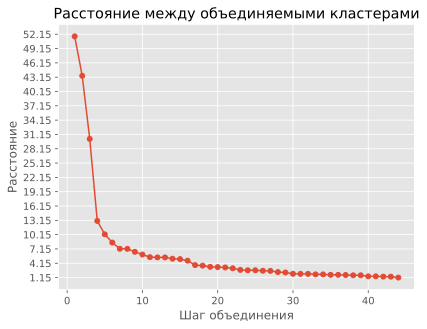

In [70]:
dist = Z[:, 2]
dist_rev = list(filter(lambda x: x > 0, dist[::-1]))
idxs = range(1, len(dist_rev) + 1)
plt.plot(idxs, dist_rev, marker='o', markersize=5)
plt.yticks(np.arange(min(dist_rev[::-1]), max(dist_rev[::-1])+1, 3))
plt.title('Расстояние между объединяемыми кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние');

Проанализировав график, можно увидеть излом после расстояния 13.15, это точка под номером 4, а значит и оптимальное число кластеров 4, наша гипотеза подтвердилась

Установим пороговое значение h = 14, после анализа дендрограммы и "каменистой осыпи"

In [71]:
h = 14

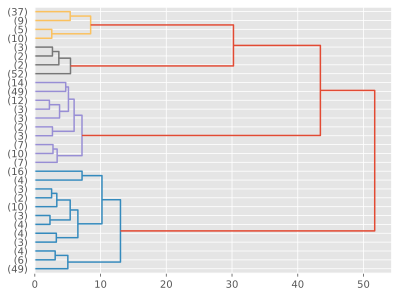

In [72]:
dn = dendrogram(Z,
                color_threshold=h,
                labels=df.index.tolist(),
                orientation='right',
                truncate_mode='lastp',
                p=30
                )

Как итог, мы получили дендрограмму, в которой определили 4 основных кластера.

Добавим в наш набор данных информацию о кластерах

In [73]:
df['cluster'] = fcluster(Z, h, criterion='distance')

In [80]:
df.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,cluster
0,4,5,5,5,3,3,3,3,3,3,3,2
1,5,4,5,5,3,3,3,3,3,3,3,2
2,5,5,4,5,3,3,3,3,3,3,3,2
3,5,4,5,5,3,3,3,3,3,3,3,2
4,4,5,5,5,3,3,3,3,3,3,3,2


In [79]:
df.groupby('cluster').size()

cluster
1    108
2    110
3     59
4     61
dtype: int64

Посмотрим среднее значение каждого признака для каждого кластера

In [83]:
df.groupby('cluster').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cluster,,,,,,,,,,,
1,2.824074,2.833333,2.768519,2.620370,2.611111,2.583333,2.750000,2.916667,4.953704,4.814815,4.861111
2,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455
3,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000
4,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098


# Интерпретация кластеров

1) Кластер под номером 1(леденцы - лекарство): в этом кластере доминируют признаки V9, V10, V11. Их значения близятся к 5(максимальная оценка), а все остальные находятся в диапазоне от 2 до 3. Можно сделать вывод, что участники опроса, попавшие в этот кластер, используют леденцы для улучшения самочувствия(здоровья)
2) Кластер под номером 2(леденцы - свежесть): участники попавшие в этот кластер ценят леденцы за их эффект свежести. На этот факт указывают признаки V1, V2, V3, V4, оценка которых близится к 5, в то время как остальные признаки данные участники в среднем оценили на троечку.
3) Кластер под номером 3(леденцы - фокус внимания): в этом кластере доминируют признаки V7 и V8. Их значения близки к 5(максимальная оценка), в то время как другие находятся в диапазоне от 2 до 3. Оба доминирующих признака этого кластера связаны с вниманием и концентрацией человека.
4) Кластер под номером 4(леденцы - сладость): в этом кластере самые высокоценные признаки - это V5 и V6. Их оценка близится к 5, в то время как остальные признаки находятся в диапазоне от 2 до 3. Доминирующие признаки нам говорят о том, что участники, которые принадлежат этому кластеру, ценят леденцы за их вкусовые свойства. они сладкие, но в то же время низкокалорийные, поэтому ими можно заменять привычные сладости.

V1: Я потребляю леденцы, чтобы освежить дыхание

V2: Я потребляю леденцы, чтобы чувствовать себя увереннее

V3: Я потребляю леденцы, чтобы освежить полость рта

V4: Я потребляю леденцы, чтобы избавиться от неприятного вкуса во рту

V5: Я потребляю леденцы как заменитель других кондитерских изделий

V6: Я потребляю леденцы, когда мне хочется чего-нибудь сладкого

V7: Леденцы помогают мне сконцентрироваться

V8: Я потребляю леденцы, чтобы отвлечься на несколько минут и подумать

V9: Я потребляю леденцы для того, чтобы облегчить боль в горле

V10: Я потребляю леденцы для того, чтобы избавиться от заложенности носа

V11: Я потребляю леденцы для улучшения самочувствия

In [85]:
df_hierarchy = df.groupby('cluster').mean() # переменная, для сравнения работы разных кластерных анализов

Попробуем применить этот же метод, предварительно нормализовав данные

In [93]:
df_norm = pd.read_csv(FILE_LOLLIPOPS, encoding=ENCODINGS[0], sep=';')

In [110]:
from sklearn import preprocessing # импорт библиотеки для стандартизации данных

stand = preprocessing.StandardScaler()
stand.fit(df_norm)
X_norm = stand.transform(df_norm)
X_norm = pd.DataFrame(X_norm, index=df_norm.index, columns=df_norm.columns)

In [111]:
X_norm.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,cluster
0,0.477424,1.542809,1.499214,1.603442,-0.239138,-0.235068,-0.301875,-0.353342,-0.623343,-0.594459,-0.600745,-0.199727
1,1.525275,0.495682,1.499214,1.603442,-0.239138,-0.235068,-0.301875,-0.353342,-0.623343,-0.594459,-0.600745,-0.199727
2,1.525275,1.542809,0.487768,1.603442,-0.239138,-0.235068,-0.301875,-0.353342,-0.623343,-0.594459,-0.600745,-0.199727
3,1.525275,0.495682,1.499214,1.603442,-0.239138,-0.235068,-0.301875,-0.353342,-0.623343,-0.594459,-0.600745,-0.199727
4,0.477424,1.542809,1.499214,1.603442,-0.239138,-0.235068,-0.301875,-0.353342,-0.623343,-0.594459,-0.600745,-0.199727


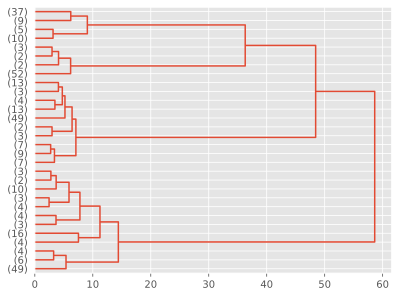

In [112]:
Z_norm = linkage(X_norm, method='ward', metric='euclidean')
dn = dendrogram(Z_norm,
                color_threshold=-1,
                labels=X_norm.index.tolist(),
                orientation='right',
                truncate_mode='lastp',
                p=30)

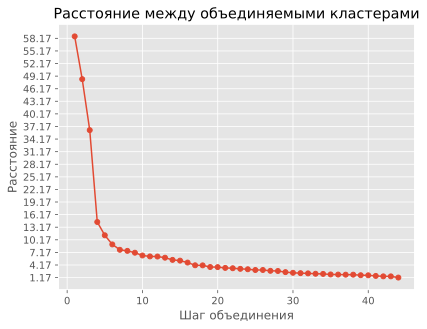

In [113]:
dist = Z_norm[:, 2]
dist_rev = list(filter(lambda x: x > 0, dist[::-1]))
idxs = range(1, len(dist_rev) + 1)
plt.plot(idxs, dist_rev, marker='o', markersize=5)
plt.yticks(np.arange(min(dist_rev[::-1]), max(dist_rev[::-1])+1, 3))
plt.title('Расстояние между объединяемыми кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние');

In [114]:
h_norm = 16

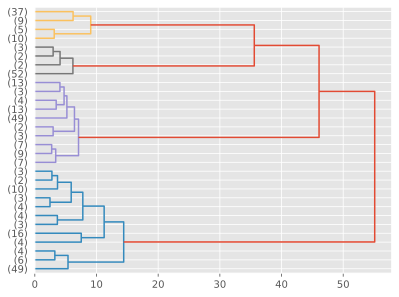

In [105]:
dn = dendrogram(Z_norm,
                color_threshold=h_norm,
                labels=X_norm.index.tolist(),
                orientation='right',
                truncate_mode='lastp',
                p=30)

In [115]:
df_norm['cluster'] = fcluster(Z_norm, h_norm, criterion='distance')

In [116]:
df_norm.groupby('cluster').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cluster,,,,,,,,,,,
1,2.824074,2.833333,2.768519,2.620370,2.611111,2.583333,2.750000,2.916667,4.953704,4.814815,4.861111
2,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455
3,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000
4,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098


## Вывод
Нормализация не изменила результаты кластеризации, значит она не нужна для выявления корректного результата